## Campos involucrados

- garage
- gimnasio
- pisccina
- usosmultiples

## Ideas



In [83]:
import pandas as pd
import geopandas
import numpy as np
import matplotlib.pyplot as plt

In [31]:
#importo las funciones para levantar los dataframes
%run "../../utils/dataset_parsing.ipynb"
#importo las funciones para graficar
%run "../../utils/graphs.ipynb"

In [41]:
df = levantar_datos("../../"+DATASET_RELATIVE_PATH)

In [42]:
df['tiene_ameneties'] = (df["gimnasio"] + df["usosmultiples"] + df["piscina"]) > 0
df['tiene_cercanias'] = (df["centroscomercialescercanos"] + df["escuelascercanas"]) > 0
df.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio', 'mes', 'ano', 'dia',
       'precio_metro_cubierto', 'precio_metro_total', 'gps', 'tiene_ameneties',
       'tiene_cercanias'],
      dtype='object')

In [85]:
ameneties=df.groupby(["tiene_ameneties"]).agg({"id":"count"})
ameneties=ameneties.rename(columns={"id":"cantidad"})


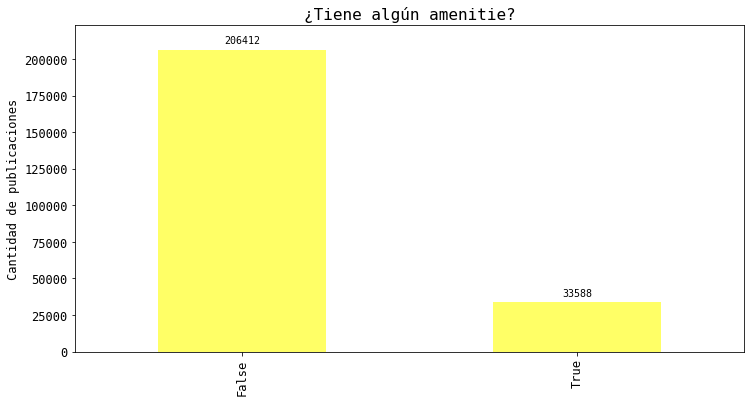

In [47]:
get_barplot(ameneties["cantidad"], title="¿Tiene algún amenitie?", y_label="Cantidad de publicaciones")

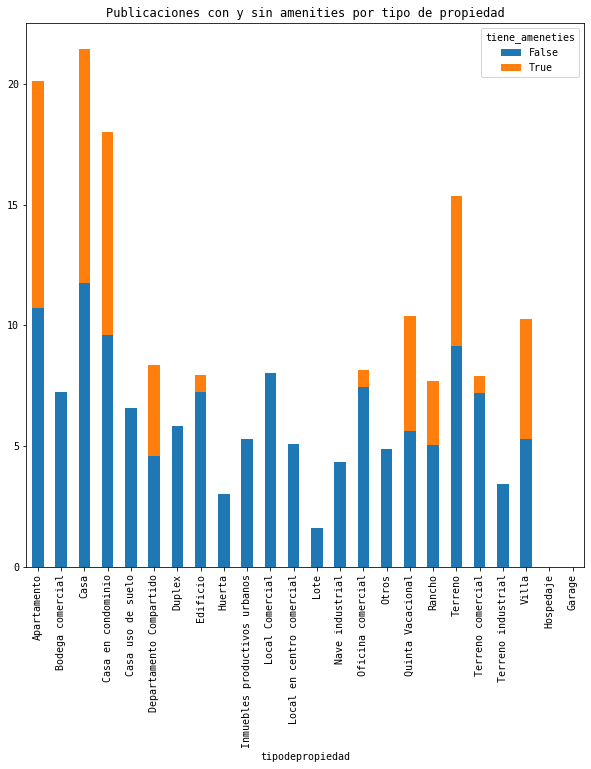

In [135]:
amenities_por_tipo = df.groupby(["tipodepropiedad","tiene_ameneties"]).agg({"id":"count"})
amenities_por_tipo.reset_index(inplace=True)
amenities_por_tipo = amenities_por_tipo.rename(columns={'id':'cantidad'})
amenities_por_tipo["cantidad"] = np.log(amenities_por_tipo['cantidad'])
amenities_por_tipo = amenities_por_tipo.pivot(index='tipodepropiedad', columns='tiene_ameneties', values='cantidad')
amenities_por_tipo.plot(kind = 'bar', stacked=True, figsize=(10,10), title="Publicaciones con y sin amenities por tipo de propiedad")

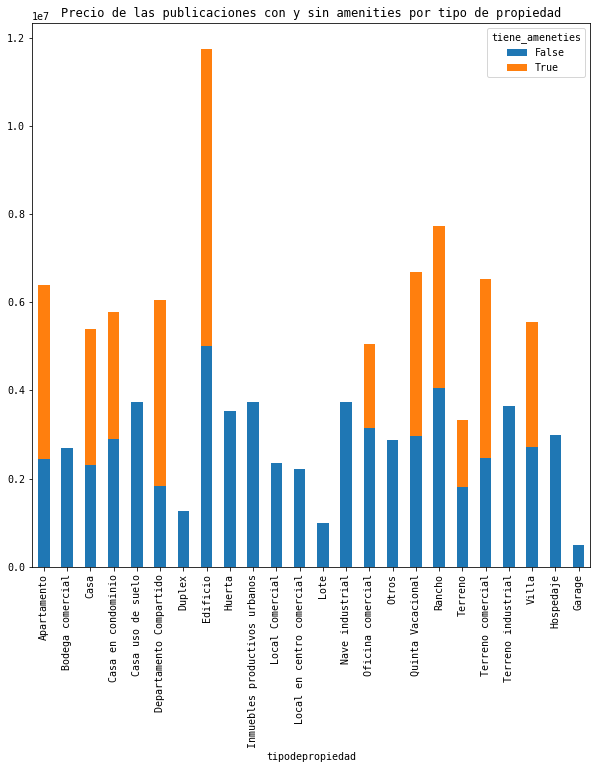

In [141]:
amenities_por_tipo = df.groupby(["tipodepropiedad","tiene_ameneties"]).agg({"precio":"mean"})
amenities_por_tipo.reset_index(inplace=True)
#amenities_por_tipo["cantidad"] = np.log(amenities_por_tipo['cantidad'])
amenities_por_tipo = amenities_por_tipo.pivot(index='tipodepropiedad', columns='tiene_ameneties', values='precio')
amenities_por_tipo.plot(kind = 'bar', stacked=True, figsize=(10,10), title="Precio de las publicaciones con y sin amenities por tipo de propiedad")

In [48]:
cercanias = df.groupby(["tiene_cercanias"]).agg({"id":"count"})
cercanias = cercanias.rename(columns={"id":"cantidad"})

,cantidad
tiene_cercanias,
False,126153
True,113847


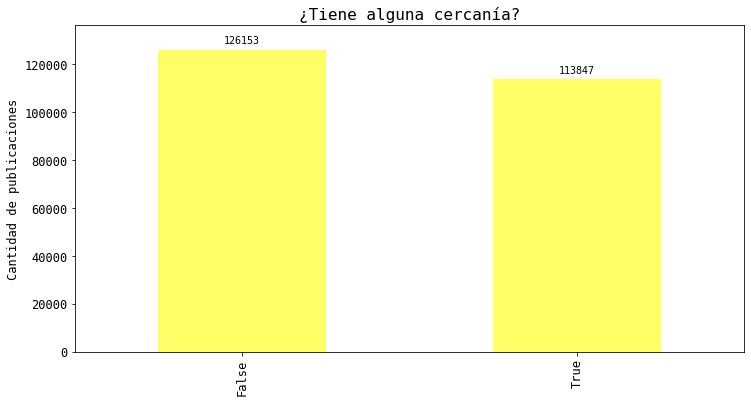

In [52]:
get_barplot(cercanias["cantidad"], title="¿Tiene alguna cercanía?", y_label="Cantidad de publicaciones")